In [1]:
from fastai.vision.all import *
from pathlib import Path
from fastai.metrics import *
from fastai.interpret import ClassificationInterpretation

In [2]:
# Set the path to your dataset (replace 'path_to_your_dataset' with the actual path)
path = Path('D:/AI Project Guidelines/project 1/data')

c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


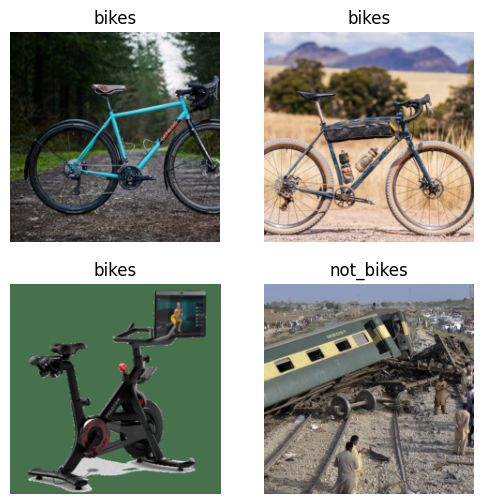

In [3]:
# Define the data loader
data = ImageDataLoaders.from_folder(path, train='train', valid='valid', seed=42, item_tfms=Resize(224), batch_tfms=[Normalize.from_stats(*imagenet_stats)], bs=4)
# Assuming you have already created the data object
data.show_batch(max_n=4)

In [4]:
data.vocab

['bikes', 'not_bikes']

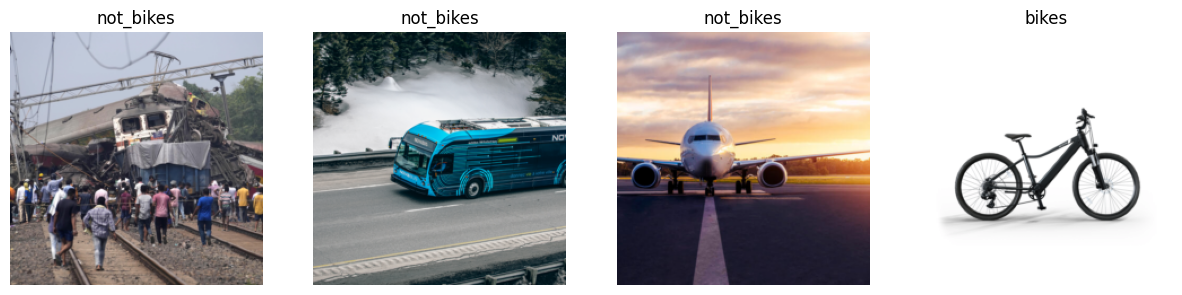

In [6]:
# Visualize a batch of augmented images
data.train.show_batch(max_n=4, nrows=1, figsize=(15, 15))

In [7]:
# Specify metrics as a list of metric functions
metrics = [accuracy, Precision(), Recall(), error_rate]
# Define the model
vgg_learn = vision_learner(data, vgg16_bn, metrics=metrics)

In [8]:
print(vgg_learn.model)

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilat

SuggestedLRs(valley=0.010964781977236271)

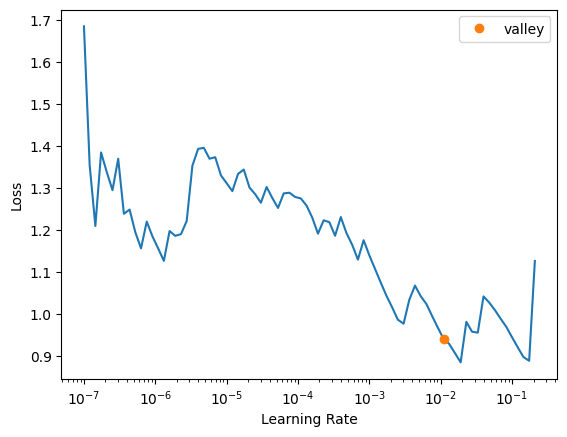

In [9]:
# Find a suitable learning rate
vgg_learn.lr_find()

In [10]:
# Train the resnet model
vgg_learn.fine_tune(4, base_lr=0.010964781977236271)

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,error_rate,time
0,0.612284,1.374060,0.830508,0.833333,0.833333,0.169492,05:04


c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,error_rate,time
0,0.739858,0.096857,0.983051,0.967742,1.000000,0.016949,07:27
1,0.960390,0.280657,0.881356,0.896552,0.866667,0.118644,07:47
2,0.699152,0.067820,0.983051,0.967742,1.000000,0.016949,07:35
3,0.486739,0.065354,0.983051,0.967742,1.000000,0.016949,07:28


c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency exp

c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


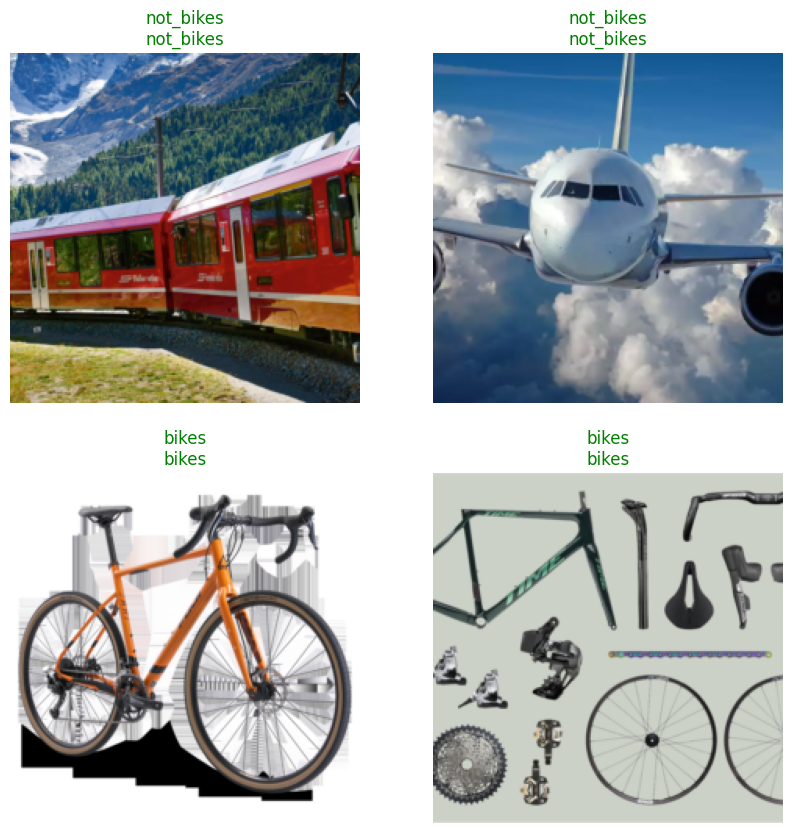

In [11]:
vgg_learn.show_results(max_n=4, figsize=(10, 10))

c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


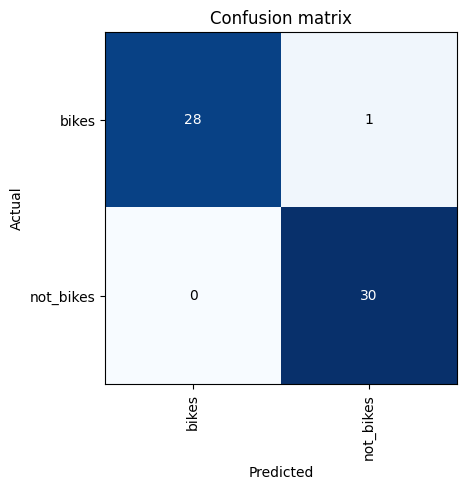

In [17]:
interp = ClassificationInterpretation.from_learner(vgg_learn)
interp.plot_confusion_matrix()

c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


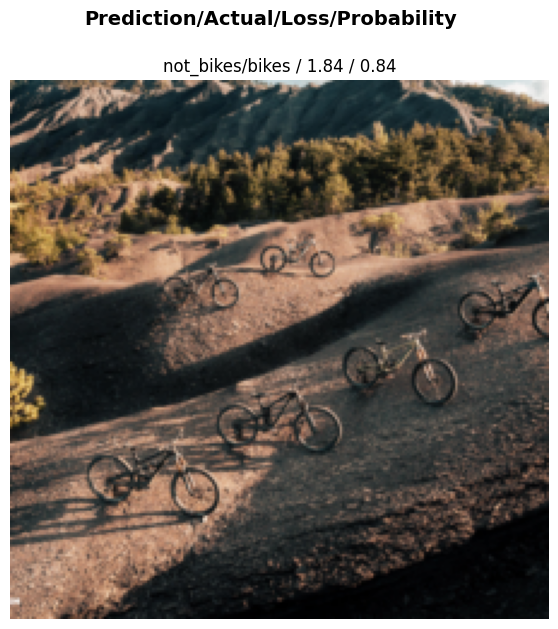

In [18]:
# Assuming 'learn' is your learner
interp = ClassificationInterpretation.from_learner(vgg_learn)

# Plot top losses
interp.plot_top_losses(1, figsize=(7, 7))

In [15]:
# Export the model for inference
vgg_learn.export('D:/AI Project Guidelines/project 1/models/vgg.pkl')

In [16]:
# Load the trained model for inference
learn = load_learner('D:/AI Project Guidelines/project 1/models/vgg.pkl')

# Make predictions on a new image
img = PILImage.create('D:/AI Project Guidelines/project 1/samples/sample5.jpeg')
prediction, _, _ = learn.predict(img)
print(f'The image is a {prediction}')

c:\Users\aciky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


The image is a bikes
